# 4 Pre-Processing and Training Data

# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
datascientist_data = pd.read_csv('raw_data/datascientist_data_step3_features.csv')

In [3]:
datascientist_data.head()

,Job Title,Job Description,Rating,Company Name,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,salary_estimate_lower_bound,salary_estimate_upper_bound,Minimum Size,Maximum Size,Location City,Location State,Headquarters City,Headquarters State,Average Salary
0,Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.500000,Hopper,2007,Company - Private,Travel Agencies,Travel & Tourism,NaN,-1,False,111.0,181.0,501.0,1000.0,New York,NY,Montreal,Canada,146.0
1,Data Scientist,"At Noom, we use scientifically proven methods ...",4.500000,Noom US,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,NaN,-1,False,111.0,181.0,1001.0,5000.0,New York,NY,New York,NY,146.0
2,DATA SCIENCE MANAGER,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,3.283576,Decode_M,-1,Unknown,-1,-1,NaN,-1,True,111.0,181.0,1.0,50.0,New York,NY,New York,NY,146.0
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.400000,Sapphire Digital,2019,Company - Private,Internet,Information Technology,NaN,"Zocdoc, Healthgrades",False,111.0,181.0,201.0,500.0,Lyndhurst,NJ,Lyndhurst,NJ,146.0
4,DIRECTOR,"Director, Data Science - (200537)\nDescription...",3.400000,United Entertainment Group,2007,Company - Private,Advertising & Marketing,Business Services,NaN,"BBDO, Grey Group, Droga5",False,111.0,181.0,51.0,200.0,New York,NY,New York,NY,146.0


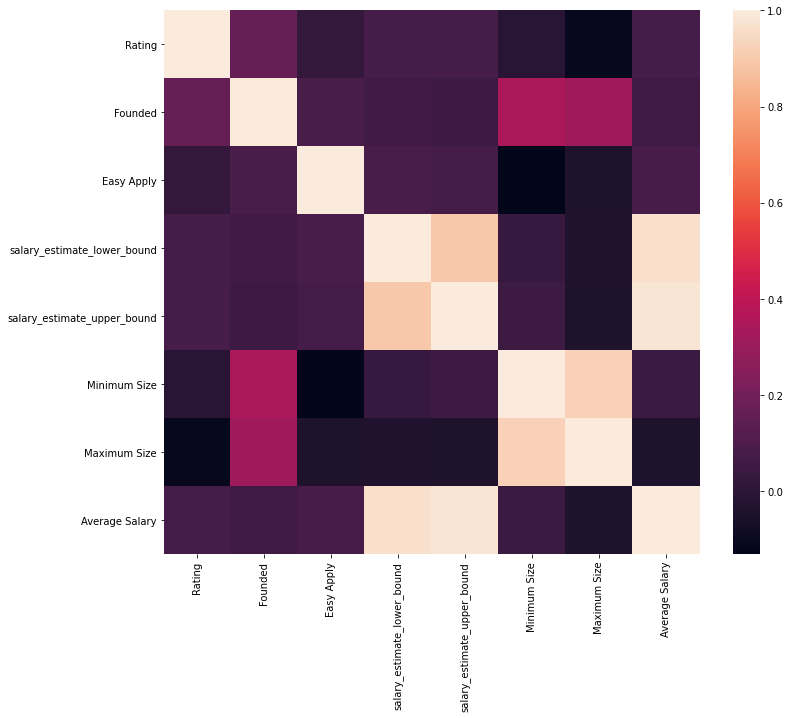

In [4]:
plt.subplots(figsize=(12,10))
sns.heatmap(datascientist_data.corr());

In [5]:
datascientist_data.head(2)

,Job Title,Job Description,Rating,Company Name,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,salary_estimate_lower_bound,salary_estimate_upper_bound,Minimum Size,Maximum Size,Location City,Location State,Headquarters City,Headquarters State,Average Salary
0,Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,2007,Company - Private,Travel Agencies,Travel & Tourism,NaN,-1,False,111.0,181.0,501.0,1000.0,New York,NY,Montreal,Canada,146.0
1,Data Scientist,"At Noom, we use scientifically proven methods ...",4.5,Noom US,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,NaN,-1,False,111.0,181.0,1001.0,5000.0,New York,NY,New York,NY,146.0


**Create dummy variable for modelling task**

In [6]:
dummies_df = pd.get_dummies(datascientist_data, columns=['Job Title','Location City','Easy Apply'],drop_first = True)

In [7]:
dummies_df.head()

,Job Description,Rating,Company Name,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,salary_estimate_lower_bound,...,Location City_West Orange,Location City_West Point,Location City_West University Place,Location City_Westerville,Location City_Westlake,Location City_Westmont,Location City_Whittier,Location City_Wilmington,Location City_Woodland Hills,Easy Apply_True
0,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.500000,Hopper,2007,Company - Private,Travel Agencies,Travel & Tourism,NaN,-1,111.0,...,0,0,0,0,0,0,0,0,0,0
1,"At Noom, we use scientifically proven methods ...",4.500000,Noom US,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,NaN,-1,111.0,...,0,0,0,0,0,0,0,0,0,0
2,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,3.283576,Decode_M,-1,Unknown,-1,-1,NaN,-1,111.0,...,0,0,0,0,0,0,0,0,0,1
3,Sapphire Digital seeks a dynamic and driven mi...,3.400000,Sapphire Digital,2019,Company - Private,Internet,Information Technology,NaN,"Zocdoc, Healthgrades",111.0,...,0,0,0,0,0,0,0,0,0,0
4,"Director, Data Science - (200537)\nDescription...",3.400000,United Entertainment Group,2007,Company - Private,Advertising & Marketing,Business Services,NaN,"BBDO, Grey Group, Droga5",111.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
datascientist_data['Headquarters State'].fillna(0)

0         Canada
1             NY
2             NY
3             NJ
4             NY
          ...   
3904          TX
3905          IL
3906          TX
3907          NE
3908     Belgium
Name: Headquarters State, Length: 3909, dtype: object

In [10]:
import os
datapath = 'raw_data'
# renaming the output data directory and re-running this notebook, for example,
# will recreate this (empty) directory and resave the data files.
# NB this is not a substitute for a modern data pipeline, for which there are
# various tools. However, for our purposes here, and often in a "one off" analysis,
# this is useful because we have to deliberately move/delete our data in order
# to overwrite it.
if not os.path.exists(datapath):
    os.mkdir(datapath)

In [11]:
datapath_datascientist_data = os.path.join(datapath, 'datascientist_data_step4_features.csv')

print(datapath_datascientist_data)
if not os.path.exists(datapath_datascientist_data):
    datascientist_data.to_csv(datapath_datascientist_data, index=False)

raw_data\datascientist_data_step4_features.csv
